# Manuscript content

This notebook is for producing manuscript content. Currently, we are tasked with only one item: a figure depicting the initial locations of indicator extractions.

In [1]:
from config import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from pyproj import Transformer

### Map of study locations

First, add the locations of Nelson Lagoon and Unalaska to the locations dict, and drop the "Aleutians" endtry:

In [2]:
locations["Nelson Lagoon"] = (55.9, -161.2)
locations["Unalaska"] = (53.9, -166.5)
del locations["Aleutians"]
# correct longitude of Ketchikan? What's provided was incorrect
locations["Ketchikan"] = (55.6, -131.6)

Transform location coordinates to EPSG:3338, and do so only for the initial locations: Nelson Lagoon, Unalaska, Eyak, Igiugik Village, Kaktovik , Ketchikan, Levelock, and Stevens Village.

In [3]:
keep_names = ["Nelson Lagoon", "Unalaska", "Eyak", "Igiugik Village", "Kaktovik", "Ketchikan", "Levelock", "Stevens Village"]
transformer = Transformer.from_crs(4326, 3338)
proj_coords = {
    p_name : transformer.transform(*coords)
    for p_name, coords in locations.items()
    if p_name in keep_names
}
proj_coords

{'Kaktovik': (400544.741382863, 2267224.229873818),
 'Stevens Village': (221918.96613451734, 1801762.1732969538),
 'Igiugik Village': (-107844.2712471918, 1035558.9282251664),
 'Levelock': (-165550.65378549087, 1015271.2034293177),
 'Eyak': (458651.2981650214, 1197256.5968959776),
 'Ketchikan': (1384328.4637828022, 856638.019823965),
 'Nelson Lagoon': (-449007.6467456462, 678732.881961473),
 'Unalaska': (-818105.077026441, 508983.6826857809)}

Add offsets for each of the locations (determined iteratively):

In [24]:
stdoff = -0.5e5
offsets = {
    # (x offset, y offset)
    "Kaktovik": (stdoff, 0),
    "Stevens Village": (stdoff, 0),
    "Igiugik Village": (-(3 * stdoff), -(2 * stdoff)),
    "Levelock": (0, 2 * stdoff),
    "Eyak": (stdoff, 0),
    "Ketchikan": (stdoff, 0),
    "Nelson Lagoon": (stdoff, 0),
    "Unalaska": (stdoff, 0)
}

Generate the map, and save it to `manuscript_dir`:

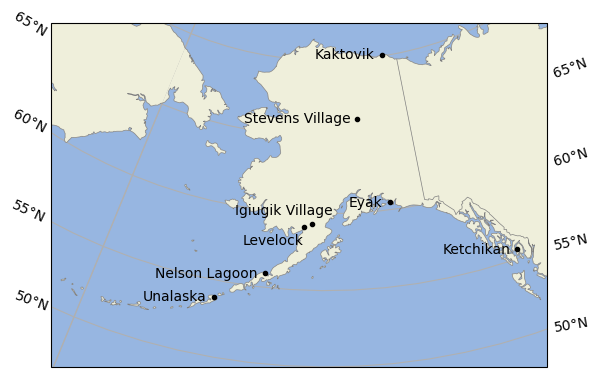

In [25]:
# proj attrs from EPSG:3338
projection=ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50, standard_parallels=(55, 65))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_extent([-2e6, 16e5, 0, 25e5], crs=projection)
ax.add_feature(cfeature.LAND, zorder=1)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='gray')

boundaries = cfeature.NaturalEarthFeature(
        category="cultural",
        name="admin_0_boundary_lines_land",
        scale="50m",
        facecolor="none"
)
ax.add_feature(boundaries, edgecolor='gray', linewidth=0.5)
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=True, y_inline=False, zorder=0)

for p_name, coords in proj_coords.items():
    x, y = coords
    ax.plot(x, y, marker="o", markersize=3, color="black")
    xoff, yoff = offsets[p_name]
    ax.text(x + xoff, y + yoff, p_name, va="center", ha="right", size=10)
    
out_fp = manuscript_dir.joinpath("initial_study_locations_map.png")
plt.savefig(out_fp, dpi=300, bbox_inches="tight", facecolor="white")

Note, If we need to color the countries, see this [SO question](https://stackoverflow.com/q/61460814/11417211).